#### Hannah M. Padgette
##### Mathematical & Computational Modeling of Infectious Diseases
##### D.B. Larremore
##### Homework 2 - due ?? Feb 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

__Problem 1__ - The goal of this problem is to develop flexibility with your Forward Euler code, and to learn a bit about the effect of step size on the accuracy of the solution.

Using your Forward Euler method, simulate the solution to the normalized SIS model discussed in class (Week 3) using $\beta = 3$ and $\gamma = 2$, and with $(s_0, i_0) = (0.99, 0.01)$. Create three plots ranging from $t = 0 to t = 25$. On the first, simulate using a step size $\delta t = 2$. On the second, use $\delta t = 1$. On the third, use $\delta t = \frac{1}{2}$. In each plot, show only your solution’s $I(t)$ in a red solid line, labeled as “Forward Euler”, and then also plot the analytical solution from class in a black dashed line, labeled as “Analytical.” Please also set the y-axis range to $[0, 0.5]$.

In [2]:
def SIS(s0, i0, t0, tf, delta_t, beta, gamma):
    n = int((tf-t0)/delta_t+1) # count the number of timepoints
    t = np.linspace(t0,tf,n)   # create a time vector 

    s = np.zeros(n)            # initialize a vector for the solution of ds/dt -> s(t)
    i = np.zeros(n)            # initialize a vector for the solution of di/dt -> i(t)

    s[0]=s0 # define the first point in S(t)
    i[0]=i0 # define the first point in I(t)

    for x in range(1,len(t)): # loop thru each solution vector starting at index 1 
        s[x] = s[x-1] + delta_t * (-beta*s[x-1]*i[x-1] + gamma*i[x-1])
        i[x] = i[x-1] + delta_t * (beta*s[x-1]*i[x-1] - gamma*i[x-1])

    return(s,i,t)

In [3]:
def SIS_analytical(i0, t0, tf, beta, gamma):
    t = np.linspace(t0,tf,1000)   # create a time vector 
    R0 = beta/gamma

    i = (1-1/R0) / (1+((1-1/R0-i0)/i0)*np.exp(-(beta-gamma)*t))

    return (i,t)

In [4]:
s0 = 0.99
i0 = 0.01
t0 = 0
tf = 25
beta = 3
gamma = 2

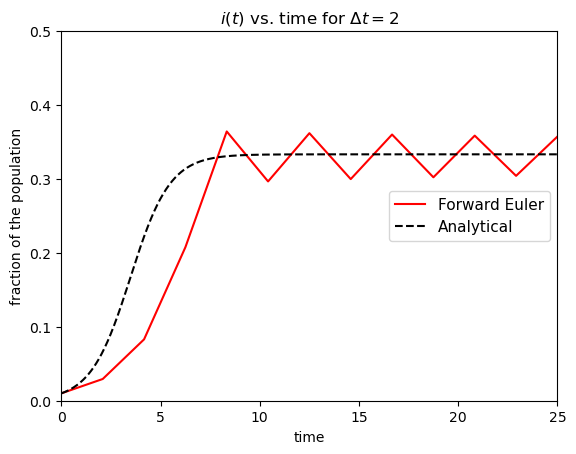

In [5]:
# plot 1

delta_t = 2

s,i,t = SIS(s0,i0,t0,tf,delta_t,beta,gamma) 
i_analytical, t_analytical = SIS_analytical(i0, t0, tf, beta, gamma)

fig, ax = plt.subplots()
# ax.plot(t,s,color='r', label='s(t) HMP')
ax.plot(t,i,color='r', label='Forward Euler')
ax.plot(t_analytical,i_analytical,color='k', linestyle='--', label='Analytical')
ax.set_xlabel('time')
ax.set_ylabel('fraction of the population')
plt.legend(loc='center right',fontsize=11)
plt.title(r'$i(t)$ vs. time for $\Delta t = 2$')
ax.set_ylim(0,0.5)
ax.set_xlim(0,25)

plt.savefig("HPadgette_CSCI7000_HW2_SIS_deltat_2.png", bbox_inches="tight", dpi=300)

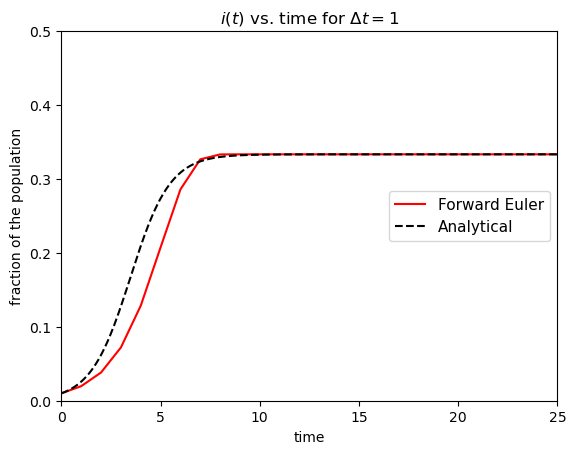

In [6]:
# plot 2

delta_t = 1

s,i,t = SIS(s0,i0,t0,tf,delta_t,beta,gamma) 
i_analytical, t_analytical = SIS_analytical(i0, t0, tf, beta, gamma)

fig, ax = plt.subplots()
# ax.plot(t,s,color='r', label='s(t) HMP')
ax.plot(t,i,color='r', label='Forward Euler')
ax.plot(t_analytical,i_analytical,color='k', linestyle='--', label='Analytical')
ax.set_xlabel('time')
ax.set_ylabel('fraction of the population')
plt.legend(loc='center right',fontsize=11)
plt.title(r'$i(t)$ vs. time for $\Delta t = 1$')
ax.set_ylim(0,0.5)
ax.set_xlim(0,25)

plt.savefig("HPadgette_CSCI7000_HW2_SIS_deltat_1.png", bbox_inches="tight", dpi=300)

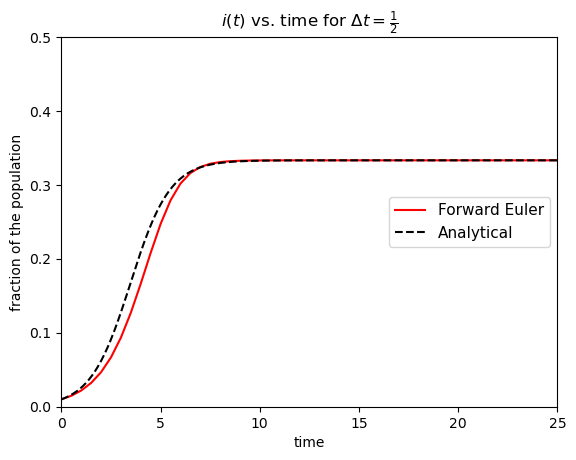

In [7]:
# plot 3

delta_t = 1/2

s,i,t = SIS(s0,i0,t0,tf,delta_t,beta,gamma) 
i_analytical, t_analytical = SIS_analytical(i0, t0, tf, beta, gamma)

fig, ax = plt.subplots()
# ax.plot(t,s,color='r', label='s(t) HMP')
ax.plot(t,i,color='r', label='Forward Euler')
ax.plot(t_analytical,i_analytical,color='k', linestyle='--', label='Analytical')
ax.set_xlabel('time')
ax.set_ylabel('fraction of the population')
plt.legend(loc='center right',fontsize=11)
plt.title(r'$i(t)$ vs. time for $\Delta t = \frac{1}{2}$')
ax.set_ylim(0,0.5)
ax.set_xlim(0,25)

plt.savefig("HPadgette_CSCI7000_HW2_SIS_deltat_0p5.png", bbox_inches="tight", dpi=300)

(0.0, 25.0)

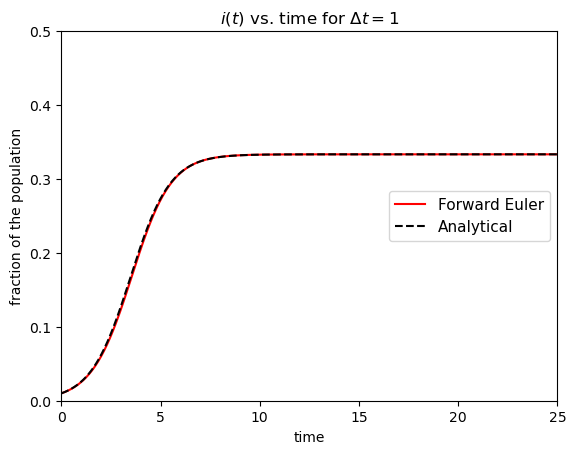

In [8]:
# plot 4

delta_t = 0.05

s,i,t = SIS(s0,i0,t0,tf,delta_t,beta,gamma) 
i_analytical, t_analytical = SIS_analytical(i0, t0, tf, beta, gamma)

fig, ax = plt.subplots()
# ax.plot(t,s,color='r', label='s(t) HMP')
ax.plot(t,i,color='r', label='Forward Euler')
ax.plot(t_analytical,i_analytical,color='k', linestyle='--', label='Analytical')
ax.set_xlabel('time')
ax.set_ylabel('fraction of the population')
plt.legend(loc='center right',fontsize=11)
plt.title(r'$i(t)$ vs. time for $\Delta t = 1$')
ax.set_ylim(0,0.5)
ax.set_xlim(0,25)

# plt.savefig("HPadgette_CSCI7000_HW2_SIS_deltat_0p05.png", bbox_inches="tight", dpi=300)

Define the maximum absolute error for a simulation using a particular $\Delta t$ as $E(\Delta t) = \substack{\text{max}\\t} \left|I_{Euler, \Delta t}(t) - I_{Analytical, \Delta t}(t) \right|$. Write a function that runs the appropriate simulation, computes the analytical solution, and returns E without plotting. Share a link to your code for this problem.

In [9]:
def maxError_SIS(s0, i0, t0, tf, delta_t, beta, gamma):

    n = int((tf-t0)/delta_t+1) # count the number of timepoints
    t = np.linspace(t0,tf,n)   # create a time vector 

    s = np.zeros(n)            # initialize a vector for the solution of ds/dt -> s(t)
    i = np.zeros(n)            # initialize a vector for the solution of di/dt -> i(t)

    s[0]=s0 # define the first point in S(t)
    i[0]=i0 # define the first point in I(t)

    for x in range(1,len(t)): # loop thru each solution vector starting at index 1 
        s[x] = s[x-1] + delta_t * (-beta*s[x-1]*i[x-1] + gamma*i[x-1])
        i[x] = i[x-1] + delta_t * (beta*s[x-1]*i[x-1] - gamma*i[x-1])

    # now find the analytical solution!
    t_analytical = np.linspace(t0,tf,1000)   # create a time vector 
    R0 = beta/gamma

    i_analytical = (1-1/R0) / (1+((1-1/R0-i0)/i0)*np.exp(-(beta-gamma)*t))

    diff = abs(i-i_analytical)
    E = np.max(diff)

    return E

Create a plot on log-log axes showing $E(\Delta t)$ vs ∆t for values $\Delta t \in \left\{2,1,\frac{1}{2},\frac{1}{4},\frac{1}{8},\frac{1}{16},\frac{1}{32} \right\}$.

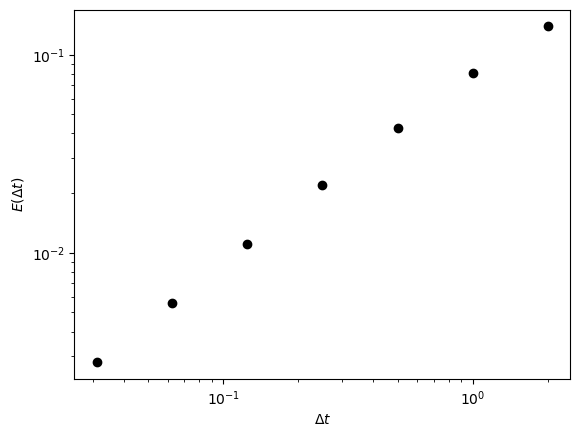

In [10]:
s0 = 0.99
i0 = 0.01
t0 = 0
tf = 25
beta = 3
gamma = 2

delta_t = np.array([2,1,1/2,1/4,1/8,1/16,1/32])
E = np.zeros(len(delta_t))

for i in range(len(delta_t)):
    E[i] = maxError_SIS(s0, i0, t0, tf, delta_t[i], beta, gamma)

fig, ax = plt.subplots()
ax.scatter(delta_t, E, color='k')  
ax.set_yscale('log')  # make y-axis log-scale
ax.set_xscale('log')  # make x-axis log-scale
ax.set_xlabel(r'$\Delta t$')
ax.set_ylabel(r'$E(\Delta t)$')

plt.savefig("HPadgette_CSCI7000_HW2_maxError_SIS.png", bbox_inches="tight", dpi=300)

__Problem 2__ - The goal of this problem is to confront the differences between the leaky model of vaccination and the all-or-nothing model of vaccination. A secondary goal is to give you a chance to get creative in how you draw connections between relevant real-world questions and the models we discuss in class.

*Part a*: Assuming SIR dynamics and no prior infections in your community, do you have any hope of reaching herd immunity through vaccination, given what you know? Why or why not?

In [11]:
R0 = np.linspace(0.1,10,1000)
VE = 0.8

v = (1/VE)*(1-(1/R0))

variants = np.array([3,4,5])
herdImmunity = (1/VE)*(1-(1/variants))

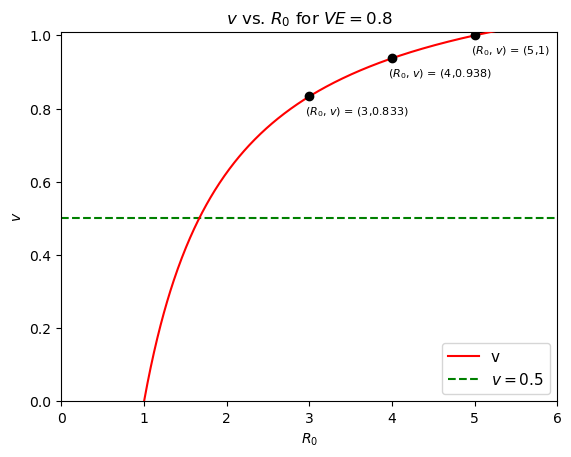

In [12]:
fig, ax = plt.subplots()

ax.plot(R0,v,color='r', zorder=3, label='v')
ax.axhline(y=0.5, color='green', linestyle='--', zorder=0, label=f'$v=0.5$')

ax.scatter(variants[0], herdImmunity[0], color='k', zorder=4)  
ax.annotate(f'($R_0$, $v$) = ({variants[0]:.0f},{herdImmunity[0]:.3f})',(variants[0],herdImmunity[0]),xytext=(variants[0]-0.05,herdImmunity[0]-0.05), fontsize=8)


ax.scatter(variants[1], herdImmunity[1], color='k', zorder=4)  
ax.annotate(f'($R_0$, $v$) = ({variants[1]:.0f},{herdImmunity[1]:.3f})',(variants[1],herdImmunity[1]),xytext=(variants[1]-0.05,herdImmunity[1]-0.05), fontsize=8)

ax.scatter(variants[2], herdImmunity[2], color='k', zorder=4)  
ax.annotate(f'($R_0$, $v$) = ({variants[2]:.0f},{herdImmunity[2]:.0f})',(variants[2],herdImmunity[2]),xytext=(variants[2]-0.05,herdImmunity[2]-0.05), fontsize=8)

ax.set_ylim(0,1.01)
ax.set_xlim(0,6)

ax.set_xlabel(f'$R_0$')
ax.set_ylabel(f'$v$')

plt.title(r'$v$ vs. $R_0$ for $VE=0.8$')
plt.legend(loc='lower right',fontsize=11)

plt.savefig("HPadgette_CSCI7000_HW2_prob2a.png", bbox_inches="tight", dpi=300)

*Part b*: Someone pipes up in the back of the meeting “Hey how many people are going to become infected anyway, even with the vaccine, when this wave rolls through?” You immediately sense that this is something you can answer, because you have taken Computational and Mathematical Modeling of Infectious Diseases, and recall that HW 2 Question 2 was something like this... Your daydreaming about class is interrupted: “...and do we care if we’re using the Leaky or All-or-Nothing model, or what the value of $R_0$ is?” You reply... [please write 3 sentences of
what you might say to your colleague in the meeting].

In [13]:
def allOrNothing(s0, i0, r0, v, VE, gamma, R0, t0, tf, delta_t):
    beta = gamma*R0
    vall0 = v*VE
    v00 = v*(1-VE)
    # note: s0 + i0 + r0 + vall0 + v00 should = 1

    n = int((tf-t0)/delta_t+1) # count the number of timepoints
    t = np.linspace(t0,tf,n)   # create a time vector 

    s = np.zeros(n)            # initialize a vector for the solution of ds/dt -> s(t)
    i = np.zeros(n)            # initialize a vector for the solution of di/dt -> i(t)
    r = np.zeros(n)            # initialize a vector for the solution of dr/dt -> r(t)
    v0 = np.zeros(n)           # initialize a vector for the solution of dv0/dt -> v0(t)
    vall = np.zeros(n)          # initialize a vector for the solution of dvall/dt -> vall(t)

    s[0]=s0 # define the first point in s(t)
    i[0]=i0 # define the first point in i(t)
    r[0]=r0 # define the first point in r(t)
    v0[0]=v00 # define the first point in v0(t)
    vall[0]=vall0 # define the first point in vall(t)

    for x in range(1,len(t)): # loop thru each solution vector starting at index 1 
        s[x] = s[x-1] + delta_t * (-beta*s[x-1]*i[x-1])
        i[x] = i[x-1] + delta_t * (beta*s[x-1]*i[x-1] + beta*v0[x-1]*i[x-1] - gamma*i[x-1])
        r[x] = r[x-1] + delta_t * (gamma*i[x-1])
        v0[x] = v0[x-1] + delta_t * (-beta*v0[x-1]*i[x-1])
        vall[x] = vall[x-1] + delta_t * (0)

    return(s,i,r,v0,vall,t)

In [14]:
def leaky(s0, i0, r0, v0, VE, gamma, R0, t0, tf, delta_t):
    beta = gamma*R0
    # note: s0 + i0 + r0 + v0 should = 1

    n = int((tf-t0)/delta_t+1) # count the number of timepoints
    t = np.linspace(t0,tf,n)   # create a time vector 

    s = np.zeros(n)            # initialize a vector for the solution of ds/dt -> s(t)
    i = np.zeros(n)            # initialize a vector for the solution of di/dt -> i(t)
    r = np.zeros(n)            # initialize a vector for the solution of dr/dt -> r(t)
    v = np.zeros(n)           # initialize a vector for the solution of dv/dt -> v(t)

    s[0]=s0 # define the first point in s(t)
    i[0]=i0 # define the first point in i(t)
    r[0]=r0 # define the first point in r(t)
    v[0]=v0 # define the first point in v(t)

    for x in range(1,len(t)): # loop thru each solution vector starting at index 1 
        s[x] = s[x-1] + delta_t * (-beta*s[x-1]*i[x-1])
        i[x] = i[x-1] + delta_t * (beta*s[x-1]*i[x-1] + beta*v[x-1]*i[x-1]*(1-VE) - gamma*i[x-1])
        r[x] = r[x-1] + delta_t * (gamma*i[x-1])
        v[x] = v[x-1] + delta_t * (-beta*v[x-1]*i[x-1]*(1-VE))

    return(s,i,r,v,t)

For R_0 = 3, r(t) at the end of the end of the simulation is = 0.44
For R_0 = 4, r(t) at the end of the end of the simulation is = 0.53
For R_0 = 5, r(t) at the end of the end of the simulation is = 0.57


(0.0, 220.0)

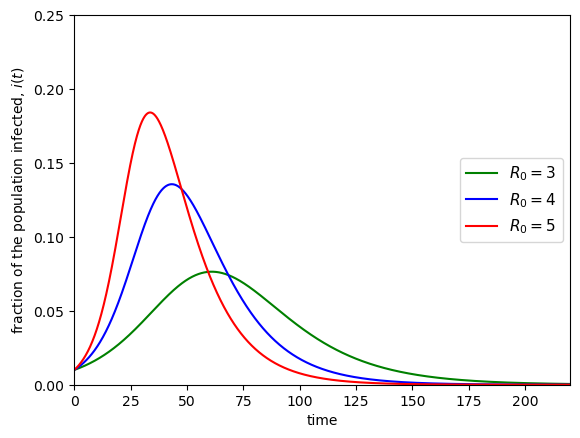

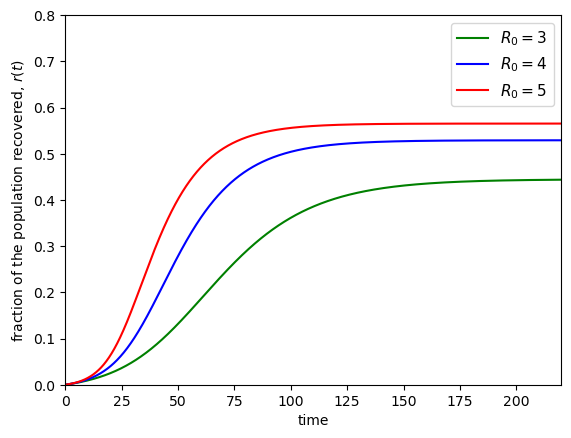

In [15]:
s0 = 0.49
i0 = 0.01
r0 = 0
v = 0.5 # maximum possible value = 0.5
VE = 0.8
gamma = 1/14
t0 = 0
tf = 220
delta_t = 0.1

R0 = 3 # can be 3, 4, or 5
s3,i3,r3,v03,vall3,t3 = allOrNothing(s0, i0, r0, v, VE, gamma, R0, t0, tf, delta_t)

R0 = 4 # can be 3, 4, or 5
s4,i4,r4,v04,vall4,t4 = allOrNothing(s0, i0, r0, v, VE, gamma, R0, t0, tf, delta_t)

R0 = 5 # can be 3, 4, or 5
s5,i5,r5,v05,vall5,t5 = allOrNothing(s0, i0, r0, v, VE, gamma, R0, t0, tf, delta_t)

print(f'For R_0 = 3, r(t) at the end of the end of the simulation is = {r3[-1]:.2f}')
print(f'For R_0 = 4, r(t) at the end of the end of the simulation is = {r4[-1]:.2f}')
print(f'For R_0 = 5, r(t) at the end of the end of the simulation is = {r5[-1]:.2f}')

fig, ax = plt.subplots()
# ax.plot(t,vall,color='r', label=r'$v_{all}(t)$')
# ax.plot(t,v0,color='g', label=r'$v_{0}(t)$')
# ax.plot(t,s,color='b', label=r'$s(t)$')
# ax.plot(t,r,color='y', label=r'$r(t)$')
ax.plot(t3,i3,color='g', label=r'$R_0 = 3$')
ax.plot(t4,i4,color='b', label=r'$R_0 = 4$')
ax.plot(t5,i5,color='r', label=r'$R_0 = 5$')
ax.set_xlabel('time')
ax.set_ylabel(r'fraction of the population infected, $i(t)$')
plt.legend(loc='center right',fontsize=11)
# plt.title(r'All or Nothing Vaccine Model: $i(t)$ vs. time for $R_0 = 3,4,5$')
ax.set_ylim(0,0.25)
ax.set_xlim(t0,tf)

# plt.savefig("HPadgette_CSCI7000_HW2_prob2b_allOrNothing.png", bbox_inches="tight", dpi=300)

fig, ax = plt.subplots()
ax.plot(t3,r3,color='g', label=r'$R_0 = 3$')
ax.plot(t4,r4,color='b', label=r'$R_0 = 4$')
ax.plot(t5,r5,color='r', label=r'$R_0 = 5$')
ax.set_xlabel('time')
ax.set_ylabel(r'fraction of the population recovered, $r(t)$')
plt.legend(loc='upper right',fontsize=11)
# plt.title(r'All or Nothing Vaccine Model: $r(t)$ vs. time for $R_0 = 3,4,5$')
ax.set_ylim(0,0.8)
ax.set_xlim(t0,tf)

# plt.savefig("HPadgette_CSCI7000_HW2_prob2b_allOrNothing_recov.png", bbox_inches="tight", dpi=300)

For R_0 = 3, r(t) at the end of the end of the simulation is = 0.54
For R_0 = 4, r(t) at the end of the end of the simulation is = 0.68
For R_0 = 5, r(t) at the end of the end of the simulation is = 0.75


(0.0, 220.0)

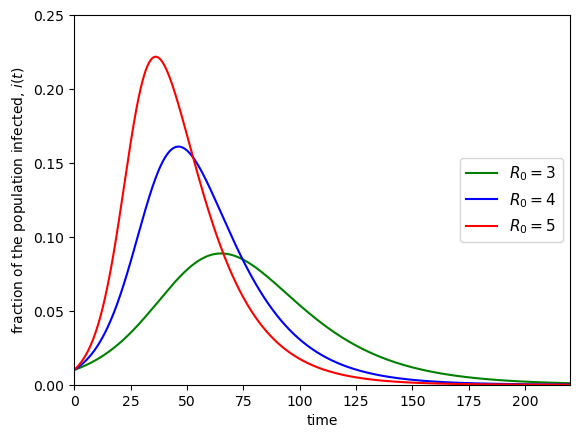

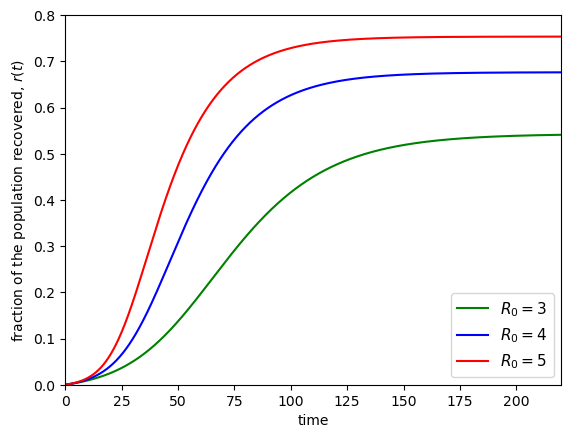

In [16]:
s0 = 0.49
i0 = 0.01
r0 = 0
v0 = 0.5 # maximum possible value = 0.5
VE = 0.8
gamma = 1/14
t0 = 0
tf = 220
delta_t = 0.1

R0 = 3 # can be 3, 4, or 5
s3,i3,r3,v3,t3 = leaky(s0, i0, r0, v0, VE, gamma, R0, t0, tf, delta_t)

R0 = 4 # can be 3, 4, or 5
s4,i4,r4,v4,t4 = leaky(s0, i0, r0, v0, VE, gamma, R0, t0, tf, delta_t)

R0 = 5 # can be 3, 4, or 5
s5,i5,r5,v5,t5 = leaky(s0, i0, r0, v0, VE, gamma, R0, t0, tf, delta_t)

print(f'For R_0 = 3, r(t) at the end of the end of the simulation is = {r3[-1]:.2f}')
print(f'For R_0 = 4, r(t) at the end of the end of the simulation is = {r4[-1]:.2f}')
print(f'For R_0 = 5, r(t) at the end of the end of the simulation is = {r5[-1]:.2f}')

fig, ax = plt.subplots()
# ax.plot(t,v,color='g', label=r'$v_{0}(t)$')
# ax.plot(t,s,color='b', label=r'$s(t)$')
# ax.plot(t,r,color='y', label=r'$r(t)$')
ax.plot(t3,i3,color='g', label=r'$R_0 = 3$')
ax.plot(t4,i4,color='b', label=r'$R_0 = 4$')
ax.plot(t5,i5,color='r', label=r'$R_0 = 5$')
ax.set_xlabel('time')
ax.set_ylabel(r'fraction of the population infected, $i(t)$')
plt.legend(loc='center right',fontsize=11)
# plt.title(r'Leaky Vaccine Model: $i(t)$ vs. time for $R_0 = 3,4,5$')
ax.set_ylim(0,0.25)
ax.set_xlim(t0,tf)

# plt.savefig("HPadgette_CSCI7000_HW2_prob2b_leaky.png", bbox_inches="tight", dpi=300)

fig, ax = plt.subplots()
ax.plot(t3,r3,color='g', label=r'$R_0 = 3$')
ax.plot(t4,r4,color='b', label=r'$R_0 = 4$')
ax.plot(t5,r5,color='r', label=r'$R_0 = 5$')
ax.set_xlabel('time')
ax.set_ylabel(r'fraction of the population recovered, $r(t)$')
plt.legend(loc='lower right',fontsize=11)
# plt.title(r'Leaky Vaccine Model: $r(t)$ vs. time for $R_0 = 3,4,5$')
ax.set_ylim(0,0.8)
ax.set_xlim(t0,tf)

# plt.savefig("HPadgette_CSCI7000_HW2_prob2b_leaky_recov.png", bbox_inches="tight", dpi=300)

*Part c*: After the meeting, your chair comes up to you, and in a way you cannot refuse, kindly says, “I liked what you said about how we might think about the differences between the different vaccine models, and how they might interact with R0 in our little community of 300, 000. Can I ask you to write up a quick one-page summary with a few graphs to show how much the model does or doesn’t matter in our scenarios?” OOOOF you think: it is the future and so you were hoping to go electric-snowboarding, but this one-pager is important. [Write the one-pager that helps a mathematically savvy person from the general public to understand your projections about infections in all three R0 scenarios and using both vaccine models. Be sure to include an executive summary sentence at the top of the report so your chair and read it aloud at a press conference if someone asks!]

For R_0 = 3, R(t) at the end of the end of the simulation is = 133130
For R_0 = 4, R(t) at the end of the end of the simulation is = 158722
For R_0 = 5, R(t) at the end of the end of the simulation is = 169578
Maximim Number of Infected Individuals: 22936
Maximum Number of Infected Individuals: 40689
Maximum Number of Infected Individuals: 55244


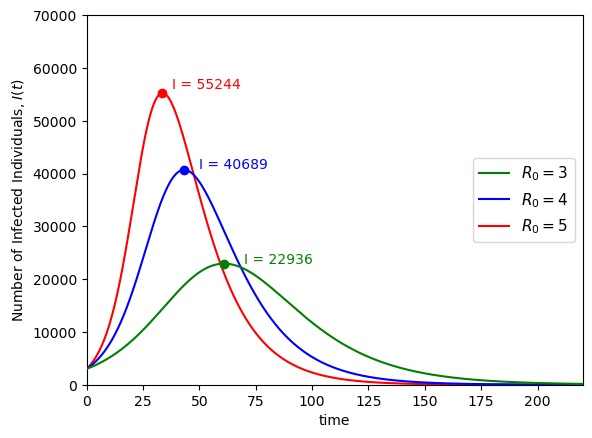

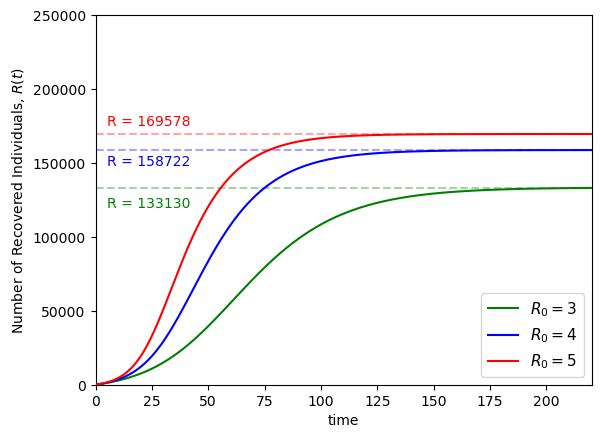

In [17]:
s0 = 0.49
i0 = 0.01
r0 = 0
v = 0.5 # maximum possible value = 0.5
VE = 0.8
gamma = 1/14
N=300000
t0 = 0
tf = 220
delta_t = 0.1

R0 = 3 # can be 3, 4, or 5
s3,i3,r3,v03,vall3,t3 = allOrNothing(s0, i0, r0, v, VE, gamma, R0, t0, tf, delta_t)

R0 = 4 # can be 3, 4, or 5
s4,i4,r4,v04,vall4,t4 = allOrNothing(s0, i0, r0, v, VE, gamma, R0, t0, tf, delta_t)

R0 = 5 # can be 3, 4, or 5
s5,i5,r5,v05,vall5,t5 = allOrNothing(s0, i0, r0, v, VE, gamma, R0, t0, tf, delta_t)


R3f = N*r3[-1]
R4f = N*r4[-1]
R5f = N*r5[-1]

I3max = N*np.max(i3)
I4max = N*np.max(i4)
I5max = N*np.max(i5)

print(f'For R_0 = 3, R(t) at the end of the end of the simulation is = {R3f:.0f}')
print(f'For R_0 = 4, R(t) at the end of the end of the simulation is = {R4f:.0f}')
print(f'For R_0 = 5, R(t) at the end of the end of the simulation is = {R5f:.0f}')
print(f'Maximim Number of Infected Individuals: {I3max:.0f}')
print(f'Maximum Number of Infected Individuals: {I4max:.0f}')
print(f'Maximum Number of Infected Individuals: {I5max:.0f}')

fig, ax = plt.subplots()

ax.plot(t3,N*i3,color='g', label=r'$R_0 = 3$',zorder=4)
ax.plot(t4,N*i4,color='b', label=r'$R_0 = 4$',zorder=3)
ax.plot(t5,N*i5,color='r', label=r'$R_0 = 5$',zorder=0)

ax.set_xlabel('time')
ax.set_ylabel(r'Number of Infected Individuals, $I(t)$')
plt.legend(loc='center right',fontsize=11)
# plt.title(r'All or Nothing Vaccine Model: $i(t)$ vs. time for $R_0 = 3,4,5$')
ax.set_ylim(0,70000)
ax.set_xlim(t0,tf)

ax.scatter(t3[np.where(N*i3==I3max)],I3max, color='g')
ax.scatter(t4[np.where(N*i4==I4max)],I4max, color='b')
ax.scatter(t5[np.where(N*i5==I5max)],I5max, color='r')

ax.annotate(f'I = {I3max:.0f}',(100,40000),xytext=(70,23000),color='g')
ax.annotate(f'I = {I4max:.0f}',(100,40000),xytext=(50,41000),color='b')
ax.annotate(f'I = {I5max:.0f}',(100,40000),xytext=(38,56000),color='r')

plt.savefig("HPadgette_CSCI7000_HW2_prob2c_allOrNothing_infect.png", bbox_inches="tight", dpi=300)

fig, ax = plt.subplots()
ax.plot(t3,N*r3,color='g', label=r'$R_0 = 3$',zorder=3)
ax.plot(t4,N*r4,color='b', label=r'$R_0 = 4$',zorder=3)
ax.plot(t5,N*r5,color='r', label=r'$R_0 = 5$',zorder=3)
ax.set_xlabel('time')
ax.set_ylabel(r'Number of Recovered Individuals, $R(t)$')
plt.legend(loc='lower right',fontsize=11)
# plt.title(r'All or Nothing Vaccine Model: $r(t)$ vs. time for $R_0 = 3,4,5$')
ax.set_ylim(0,250000)
ax.set_xlim(t0,tf)

plt.axhline(y=R3f,color='g',alpha=0.35,linestyle='--',zorder=0)
plt.axhline(y=R4f,color='b',alpha=0.35,linestyle='--',zorder=0)
plt.axhline(y=R5f,color='r',alpha=0.35,linestyle='--',zorder=0)
ax.annotate(f'R = {R3f:.0f}',(100,40000),xytext=(5,120000),color='g')
ax.annotate(f'R = {R4f:.0f}',(100,40000),xytext=(5,148000),color='b')
ax.annotate(f'R = {R5f:.0f}',(100,40000),xytext=(5,175000),color='r')

plt.savefig("HPadgette_CSCI7000_HW2_prob2c_allOrNothing_recov.png", bbox_inches="tight", dpi=300)

For R_0 = 3, R(t) at the end of the end of the simulation is = 162301
For R_0 = 4, R(t) at the end of the end of the simulation is = 202850
For R_0 = 5, R(t) at the end of the end of the simulation is = 226042
Maximim Number of Infected Individuals: 26641
Maximum Number of Infected Individuals: 48324
Maximum Number of Infected Individuals: 66560


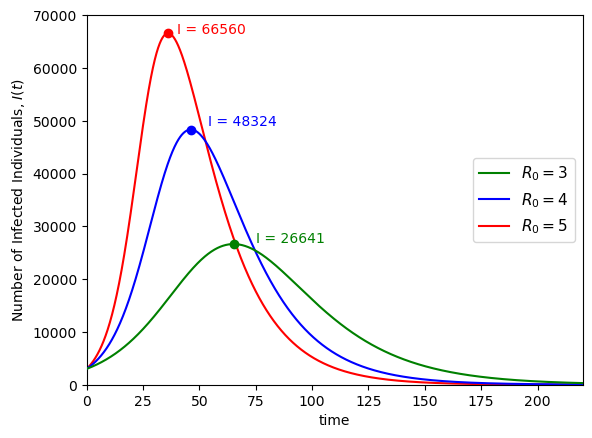

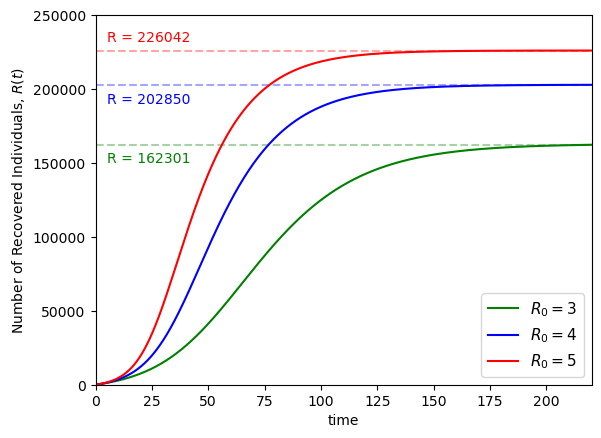

In [18]:
s0 = 0.49
i0 = 0.01
r0 = 0
v0 = 0.5 # maximum possible value = 0.5
VE = 0.8
gamma = 1/14
N=300000
t0 = 0
tf = 220
delta_t = 0.1

R0 = 3 # can be 3, 4, or 5
s3,i3,r3,v3,t3 = leaky(s0, i0, r0, v0, VE, gamma, R0, t0, tf, delta_t)

R0 = 4 # can be 3, 4, or 5
s4,i4,r4,v4,t4 = leaky(s0, i0, r0, v0, VE, gamma, R0, t0, tf, delta_t)

R0 = 5 # can be 3, 4, or 5
s5,i5,r5,v5,t5 = leaky(s0, i0, r0, v0, VE, gamma, R0, t0, tf, delta_t)

R3f = N*r3[-1]
R4f = N*r4[-1]
R5f = N*r5[-1]

I3max = N*np.max(i3)
I4max = N*np.max(i4)
I5max = N*np.max(i5)

print(f'For R_0 = 3, R(t) at the end of the end of the simulation is = {N*r3[-1]:.0f}')
print(f'For R_0 = 4, R(t) at the end of the end of the simulation is = {N*r4[-1]:.0f}')
print(f'For R_0 = 5, R(t) at the end of the end of the simulation is = {N*r5[-1]:.0f}')
print(f'Maximim Number of Infected Individuals: {N*np.max(i3):.0f}')
print(f'Maximum Number of Infected Individuals: {N*np.max(i4):.0f}')
print(f'Maximum Number of Infected Individuals: {N*np.max(i5):.0f}')

fig, ax = plt.subplots()
# ax.plot(t,v,color='g', label=r'$v_{0}(t)$')
# ax.plot(t,s,color='b', label=r'$s(t)$')
# ax.plot(t,r,color='y', label=r'$r(t)$')
ax.plot(t3,N*i3,color='g', label=r'$R_0 = 3$',zorder=4)
ax.plot(t4,N*i4,color='b', label=r'$R_0 = 4$',zorder=3)
ax.plot(t5,N*i5,color='r', label=r'$R_0 = 5$',zorder=0)
ax.set_xlabel('time')
ax.set_ylabel(r'Number of Infected Individuals, $I(t)$')
plt.legend(loc='center right',fontsize=11)
# plt.title(r'Leaky Vaccine Model: $i(t)$ vs. time for $R_0 = 3,4,5$')
ax.set_ylim(0,70000)
ax.set_xlim(t0,tf)


ax.scatter(t3[np.where(N*i3==I3max)],I3max, color='g')
ax.scatter(t4[np.where(N*i4==I4max)],I4max, color='b')
ax.scatter(t5[np.where(N*i5==I5max)],I5max, color='r')

ax.annotate(f'I = {I3max:.0f}',(100,40000),xytext=(75,27000),color='g')
ax.annotate(f'I = {I4max:.0f}',(100,40000),xytext=(54,49000),color='b')
ax.annotate(f'I = {I5max:.0f}',(100,40000),xytext=(40,66500),color='r')

plt.savefig("HPadgette_CSCI7000_HW2_prob2c_leaky_infect.png", bbox_inches="tight", dpi=300)

fig, ax = plt.subplots()
ax.plot(t3,N*r3,color='g', label=r'$R_0 = 3$')
ax.plot(t4,N*r4,color='b', label=r'$R_0 = 4$')
ax.plot(t5,N*r5,color='r', label=r'$R_0 = 5$')
ax.set_xlabel('time')
ax.set_ylabel(r'Number of Recovered Individuals, $R(t)$')
plt.legend(loc='lower right',fontsize=11)
# plt.title(r'Leaky Vaccine Model: $r(t)$ vs. time for $R_0 = 3,4,5$')
ax.set_ylim(0,250000)
ax.set_xlim(t0,tf)

plt.axhline(y=R3f,color='g',alpha=0.35,linestyle='--',zorder=0)
plt.axhline(y=R4f,color='b',alpha=0.35,linestyle='--',zorder=0)
plt.axhline(y=R5f,color='r',alpha=0.35,linestyle='--',zorder=0)
ax.annotate(f'R = {R3f:.0f}',(100,40000),xytext=(5,150000),color='g')
ax.annotate(f'R = {R4f:.0f}',(100,40000),xytext=(5,190000),color='b')
ax.annotate(f'R = {R5f:.0f}',(100,40000),xytext=(5,232000),color='r')

plt.savefig("HPadgette_CSCI7000_HW2_prob2c_leaky_recov.png", bbox_inches="tight", dpi=300)

In [19]:
# fold-change in I_max b/w AoN and Leaky models
print(1-22936/26642)
print(1-40689/48324)
print(1-55244/66560)

# fold-change in R_f b/w AoN and Leaky models
print(1-133130/162301)
print(1-158722/202850)
print(1-169578/226042)

0.1391036708955784
0.15799602681897196
0.17001201923076925
0.17973395111551993
0.21754005422726153
0.24979428601764275


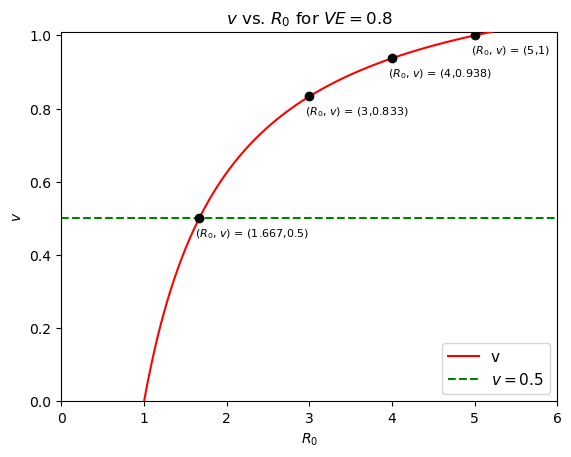

In [20]:
R0 = np.linspace(0.1,10,1000)
VE = 0.8

v = (1/VE)*(1-(1/R0))

variants = np.array([3,4,5])
herdImmunity = (1/VE)*(1-(1/variants))

fig, ax = plt.subplots()

ax.plot(R0,v,color='r', zorder=3, label='v')
ax.axhline(y=0.5, color='green', linestyle='--', zorder=0, label=f'$v=0.5$')

ax.scatter(variants[0], herdImmunity[0], color='k', zorder=4)  
ax.annotate(f'($R_0$, $v$) = ({variants[0]:.0f},{herdImmunity[0]:.3f})',(variants[0],herdImmunity[0]),xytext=(variants[0]-0.05,herdImmunity[0]-0.05), fontsize=8)


ax.scatter(variants[1], herdImmunity[1], color='k', zorder=4)  
ax.annotate(f'($R_0$, $v$) = ({variants[1]:.0f},{herdImmunity[1]:.3f})',(variants[1],herdImmunity[1]),xytext=(variants[1]-0.05,herdImmunity[1]-0.05), fontsize=8)

ax.scatter(variants[2], herdImmunity[2], color='k', zorder=4)  
ax.annotate(f'($R_0$, $v$) = ({variants[2]:.0f},{herdImmunity[2]:.0f})',(variants[2],herdImmunity[2]),xytext=(variants[2]-0.05,herdImmunity[2]-0.05), fontsize=8)

ax.scatter((1/0.6), 0.5, color='k', zorder=4)  
ax.annotate(f'($R_0$, $v$) = ({(1/0.6):.3f},{0.5})',((1/0.6),0.5),xytext=((1/0.6)-0.05,0.5-0.05), fontsize=8)

ax.set_ylim(0,1.01)
ax.set_xlim(0,6)

ax.set_xlabel(f'$R_0$')
ax.set_ylabel(f'$v$')

plt.title(r'$v$ vs. $R_0$ for $VE=0.8$')
plt.legend(loc='lower right',fontsize=11)

plt.savefig("HPadgette_CSCI7000_HW2_prob2c_R0.png", bbox_inches="tight", dpi=300)